# Output analysis
Die CSV Dateien werden je Simulation generiert und enthalten unterschiedliche Informationen, die anhand dieses Notebooks ausgewertet werden.

In [10]:
# @title Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# @title Mount drive and read output data
# from google.colab import drive
# drive.mount('/content/drive/')

dir = "SOHTravellingBox\out"
arrivalGraph = pd.read_csv('{0}\\arrivalGraph.csv'.format(dir), sep=";")
deadAgentsGraph = pd.read_csv('{0}\deadAgentsGraph.csv'.format(dir), sep=";")
familyDistribution = pd.read_csv('{0}\\familyDistribution.csv'.format(dir), sep=";")
genderDistribution = pd.read_csv('{0}\genderDistribution.csv'.format(dir), sep=";")
householdTypeDistribution = pd.read_csv('{0}\householdTypeDistribution.csv'.format(dir), sep=";")
waterLevel = pd.read_csv('{0}\waterLevel.csv'.format(dir), sep=";")
houses = pd.read_csv('{0}\houses.csv'.format(dir), sep=";")
config = pd.read_csv('{0}\config.csv'.format(dir), sep=";")

# Plot analysis for following config

In [12]:
# @title Simulationkonfiguration
population = config.iloc[0]['Value']
households = config.iloc[1]['Value']
singleHousehold = config.iloc[2]['Value']
familyDistanceThreshold = config.iloc[3]['Value']
minTargetDistance = config.iloc[4]['Value']
numSpawnPoints = config.iloc[5]['Value']
evacuationPoint = config.iloc[6]['Value']

# Plot Distributions

In [13]:
print(config)

                      Name                          Value
0               population                           1415
1                household                            770
2          singleHousehold                            458
3  familyDistanceThreshold                             20
4        minTargetDistance                              2
5           numSpawnPoints                            233
6          evacuationPoint  POINT (10.0213807 53.5248662)


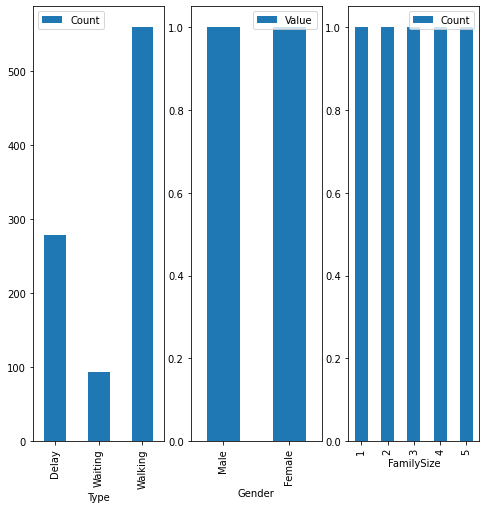

In [14]:
fig, ax = plt.subplots(figsize=(8,8),nrows=1, ncols=3)
barHouseholds = householdTypeDistribution.plot(ax=ax[0], kind="bar", x="Type")
barGender = genderDistribution.plot(ax=ax[1], kind="bar", x="Gender")
barFamilyDistribution = familyDistribution.plot(ax=ax[2], kind="bar", x="FamilySize")
plt.show()

## Plot households

In [15]:
# @title Prepare dataset and cut of ( )
plot_households = houses.Coordinate.str.split(',', expand=True)
plot_households.rename(columns={plot_households.columns[0]: 'latitude', plot_households.columns[1]: 'longitude'}, inplace=True)
plot_households.latitude = plot_households.latitude.str[1:]
plot_households.longitude = plot_households.longitude.str[:-1]

In [16]:
# @title Convert object to float
plot_households.latitude = plot_households.latitude.astype(float)
plot_households.longitude = plot_households.longitude.astype(float)

In [17]:
BBox = ((10.0136, 10.0256, 53.5222, 53.5321))

In [18]:
map = plt.imread('SOHTravellingBox\data\map_veddel.png')

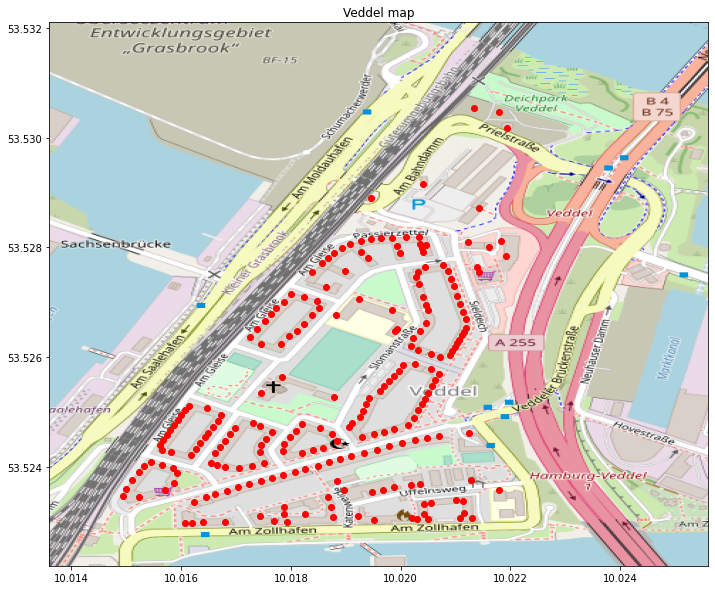

In [19]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(plot_households.longitude, plot_households.latitude, c='red')

ax.set_title('Veddel map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')

## Plotting agents by time

In [20]:
# @markdown Rename columns for plot
deadAgentsGraph.rename(columns={'Number': 'Number of dead agents'}, inplace=True)
arrivalGraph.rename(columns={'Number': 'Number of arriving agents'}, inplace=True)

In [21]:
# @markdown Plot configurations
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

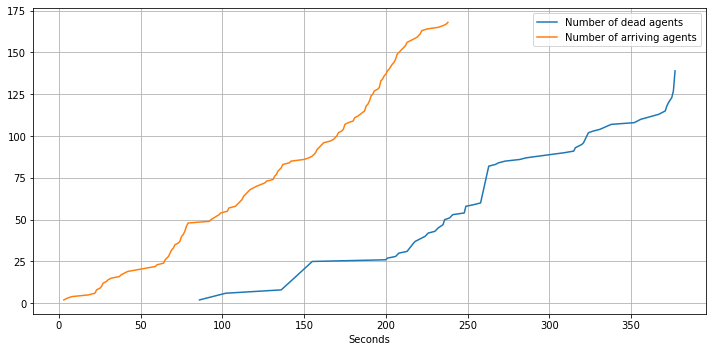

In [22]:
# @markdown Agents by time (dead and arriving)
ax = deadAgentsGraph.plot(x='Seconds', y='Number of dead agents')
arrivalGraph.plot(ax=ax, x='Seconds', y='Number of arriving agents', grid=True)

plt.show()

## Water level

In [23]:
# @markdown Plot configurations
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

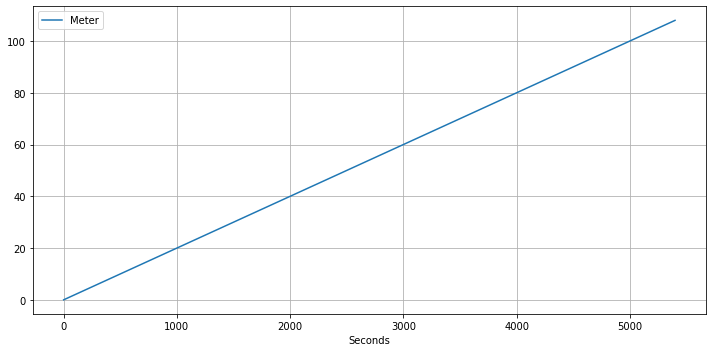

In [24]:
# @markdown Agents by time (dead and arriving)
waterLevel.plot(x='Seconds', y='Meter', grid=True)

plt.show()